In [ ]:
!sudo apt update

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [975 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

In [ ]:
!pip install -q findspark

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.context import SparkContext
#create SparkContext
sc = SparkContext("local", "My First Spark Application")
print("SparkContext :",sc)

SparkContext : <SparkContext master=local appName=My First Spark Application>


In [ ]:
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
# cau 1.1
df = spark.read.option('inferSchema', 'true').option('header', 'true').csv('/content/diemthi2020.csv')

In [ ]:
df = df.withColumn('sbd', col('sbd').cast('string'))
df = df.withColumn('Tinh', substring(col('sbd'), 1, 2))

In [ ]:
df.printSchema()

root
 |-- TT: integer (nullable = true)
 |-- Dia: double (nullable = true)
 |-- GDCD: double (nullable = true)
 |-- Hoa: double (nullable = true)
 |-- Li: double (nullable = true)
 |-- Ma_mon_ngoai_ngu: string (nullable = true)
 |-- Ngoai_ngu: double (nullable = true)
 |-- Sinh: double (nullable = true)
 |-- Su: double (nullable = true)
 |-- Toan: double (nullable = true)
 |-- Van: double (nullable = true)
 |-- sbd: string (nullable = true)
 |-- Tinh: string (nullable = true)



In [ ]:
# cau 1.2
lst = ['Dia','GDCD','Hoa','Li','Ngoai_ngu','Sinh','Su','Toan','Van']
df_desc = df.describe(lst)

In [ ]:
df_desc.show()

+-------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+
|summary|               Dia|              GDCD|               Hoa|                Li|        Ngoai_ngu|             Sinh|                Su|              Toan|               Van|
+-------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+
|  count|            555072|            482980|            295536|            293287|           772098|           290377|            568581|            866581|            856565|
|   mean| 6.773215456733541| 8.125164085469377| 6.705224575009474| 6.718000627371824|4.568337179995096|5.588040719478471| 5.181097328261057| 6.662270924472259| 6.601824858592264|
| stddev|1.1717020440655355|1.0903104804184345|1.6079244808843955|1.4978995382525322|1.808446385073862|1.

In [ ]:
# cau 1.3
# do lech cua 3 mon thi 
df.agg({'Toan':'skewness'}).show()
df.agg({'Van':'skewness'}).show()
df.agg({'Ngoai_ngu':'skewness'}).show()

+-------------------+
|     skewness(Toan)|
+-------------------+
|-0.6491546552737398|
+-------------------+

+-------------------+
|      skewness(Van)|
+-------------------+
|-0.6372977451997116|
+-------------------+

+-------------------+
|skewness(Ngoai_ngu)|
+-------------------+
| 0.6859419666786937|
+-------------------+



In [ ]:
# do nhon cua 3 mon thi 
df.agg({'Toan':'kurtosis'}).show()
df.agg({'Van':'kurtosis'}).show()
df.agg({'Ngoai_ngu':'kurtosis'}).show()

+-------------------+
|     kurtosis(Toan)|
+-------------------+
|-0.3387735156523042|
+-------------------+

+-------------------+
|      kurtosis(Van)|
+-------------------+
|0.48896728129650757|
+-------------------+

+--------------------+
| kurtosis(Ngoai_ngu)|
+--------------------+
|-0.19393743615377046|
+--------------------+



In [ ]:
#cau 1.4 a 
hist_t = df.select('Toan').rdd.flatMap(lambda row: row).histogram(20)
hist_v = df.select('Van').rdd.flatMap(lambda row: row).histogram(20)
hist_nn = df.select('Ngoai_ngu').rdd.flatMap(lambda row: row).histogram(20)

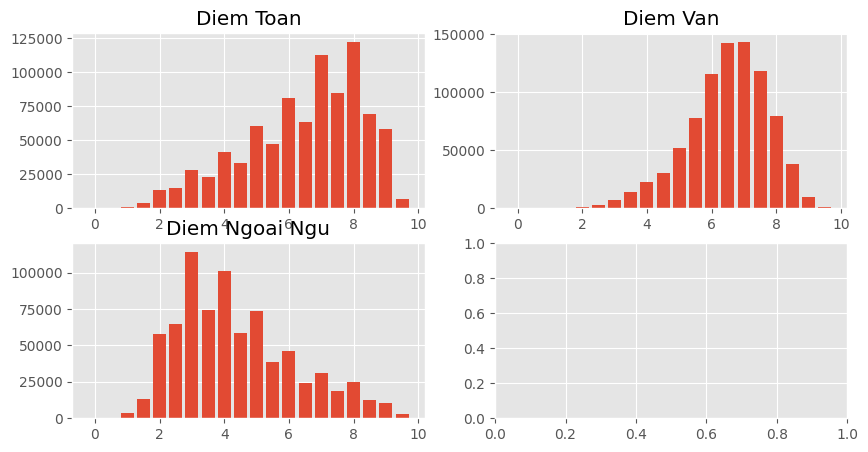

In [ ]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))
ax1.bar(hist_t[0][:-1], hist_t[1], width = 0.4)
ax1.set(title = 'Diem Toan')
ax2.bar(hist_v[0][:-1], hist_v[1], width = 0.4)
ax2.set(title = 'Diem Van')
ax3.bar(hist_nn[0][:-1], hist_nn[1], width = 0.4)
ax3.set(title = 'Diem Ngoai Ngu')
plt.show()

In [ ]:
# cau 1.4b
dat_t = {'dat_t': df.select('Toan').filter(df['Toan'].isNotNull()).rdd.flatMap(lambda row: row).collect()}
dat_v = {'dat_v': df.select('Van').filter(df['Van'].isNotNull()).rdd.flatMap(lambda row: row).collect()}
dat_nn = {'dat_nn': df.select('Ngoai_ngu').filter(df['Ngoai_ngu'].isNotNull()).rdd.flatMap(lambda row: row).collect()}

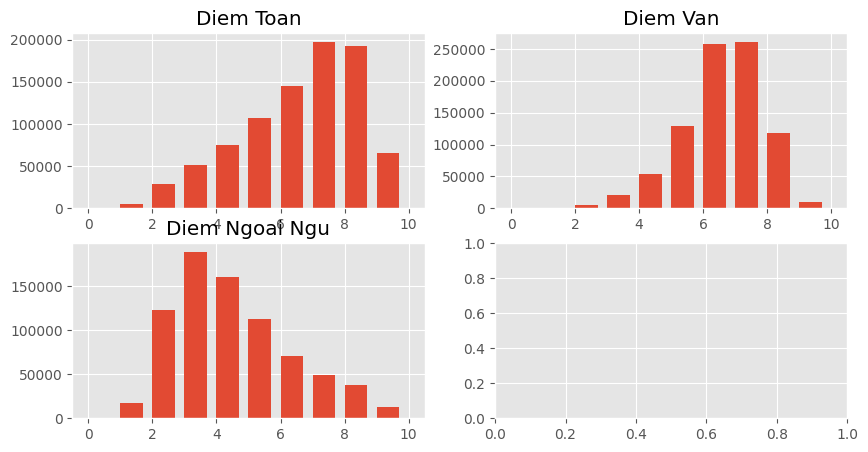

In [ ]:
lst = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))
ax1.hist(dat_t['dat_t'], bins = lst, width = 0.7)
ax1.set(title = 'Diem Toan')
ax2.hist(dat_v['dat_v'], bins = lst, width = 0.7)
ax2.set(title = 'Diem Van')
ax3.hist(dat_nn['dat_nn'], bins = lst, width = 0.7)
ax3.set(title = 'Diem Ngoai Ngu')
plt.show()

In [ ]:
# cau 1.5
cols = ['Dia','GDCD','Hoa','Li','Ngoai_ngu','Sinh','Su','Toan','Van']
bounds = {}
for col in cols:
  quantiles = df.approxQuantile(col, [0.25, 0.75], 0.05)
  IQR = quantiles[1] - quantiles[0]
  bounds[col] = [quantiles[0]-1.5*IQR , quantiles[1]+1.5*IQR]

In [ ]:
outliers = df.select(*['sbd'] + [( (df[c] < bounds[c][0]) | (df[c] > bounds[c][1])).alias(c+'_o') for c in cols ])
outliers.show(10)

+--------+-----+------+-----+-----+-----------+------+-----+------+-----+
|     sbd|Dia_o|GDCD_o|Hoa_o| Li_o|Ngoai_ngu_o|Sinh_o| Su_o|Toan_o|Van_o|
+--------+-----+------+-----+-----+-----------+------+-----+------+-----+
|18014547|false| false| null| null|      false|  null|false| false|false|
|18014530|false| false| null| null|      false|  null|false| false|false|
|18014521|false|  null| null| null|       null|  null|false| false|false|
|18014517|false| false| null| null|      false|  null|false| false|false|
|18014523| null|  null|false|false|      false| false| null| false|false|
|18014516|false|  null| null| null|       null|  null|false| false|false|
|18014518|false| false| null| null|      false|  null|false| false|false|
|18014526|false| false| null| null|      false|  null|false| false|false|
|18014524|false| false| null| null|      false|  null|false| false|false|
|18014527| null|  null|false|false|      false| false| null| false|false|
+--------+-----+------+-----+-----+---

In [ ]:
df_outliers = df.join(outliers, on='sbd')

In [ ]:
lst1 = ['Dia','GDCD','Hoa','Li']#,'Ngoai_ngu','Sinh','Su','Toan','Van']
for x in lst1:
  df_outliers.filter(x+'_o').select('sbd', x).show(5)

+--------+----+
|     sbd| Dia|
+--------+----+
|10000723|2.25|
|10004662|2.75|
| 1071276| 3.0|
| 1077907|3.25|
|13001335| 2.5|
+--------+----+
only showing top 5 rows

+--------+----+
|     sbd|GDCD|
+--------+----+
| 1065406| 3.5|
| 1071276|4.75|
|12005101|4.75|
|12010287|4.75|
|12012351| 5.0|
+--------+----+
only showing top 5 rows

+--------+----+
|     sbd| Hoa|
+--------+----+
| 1043423| 2.0|
| 2048619|2.25|
|22009109|2.25|
|23000807|2.25|
|28004786|2.25|
+--------+----+
only showing top 5 rows

+--------+----+
|     sbd|  Li|
+--------+----+
| 1015552|2.75|
| 1023078|2.25|
| 1079233| 1.5|
|18009732|2.75|
| 2001615|2.25|
+--------+----+
only showing top 5 rows



In [ ]:
# cau 1.6
cols

['Dia', 'GDCD', 'Hoa', 'Li', 'Ngoai_ngu', 'Sinh', 'Su', 'Toan', 'Van']

In [ ]:
dicts = {}
for col in cols:
  dicts[col] = df.select(col).filter(df[col].isNotNull()).rdd.flatMap(lambda row: row).collect()

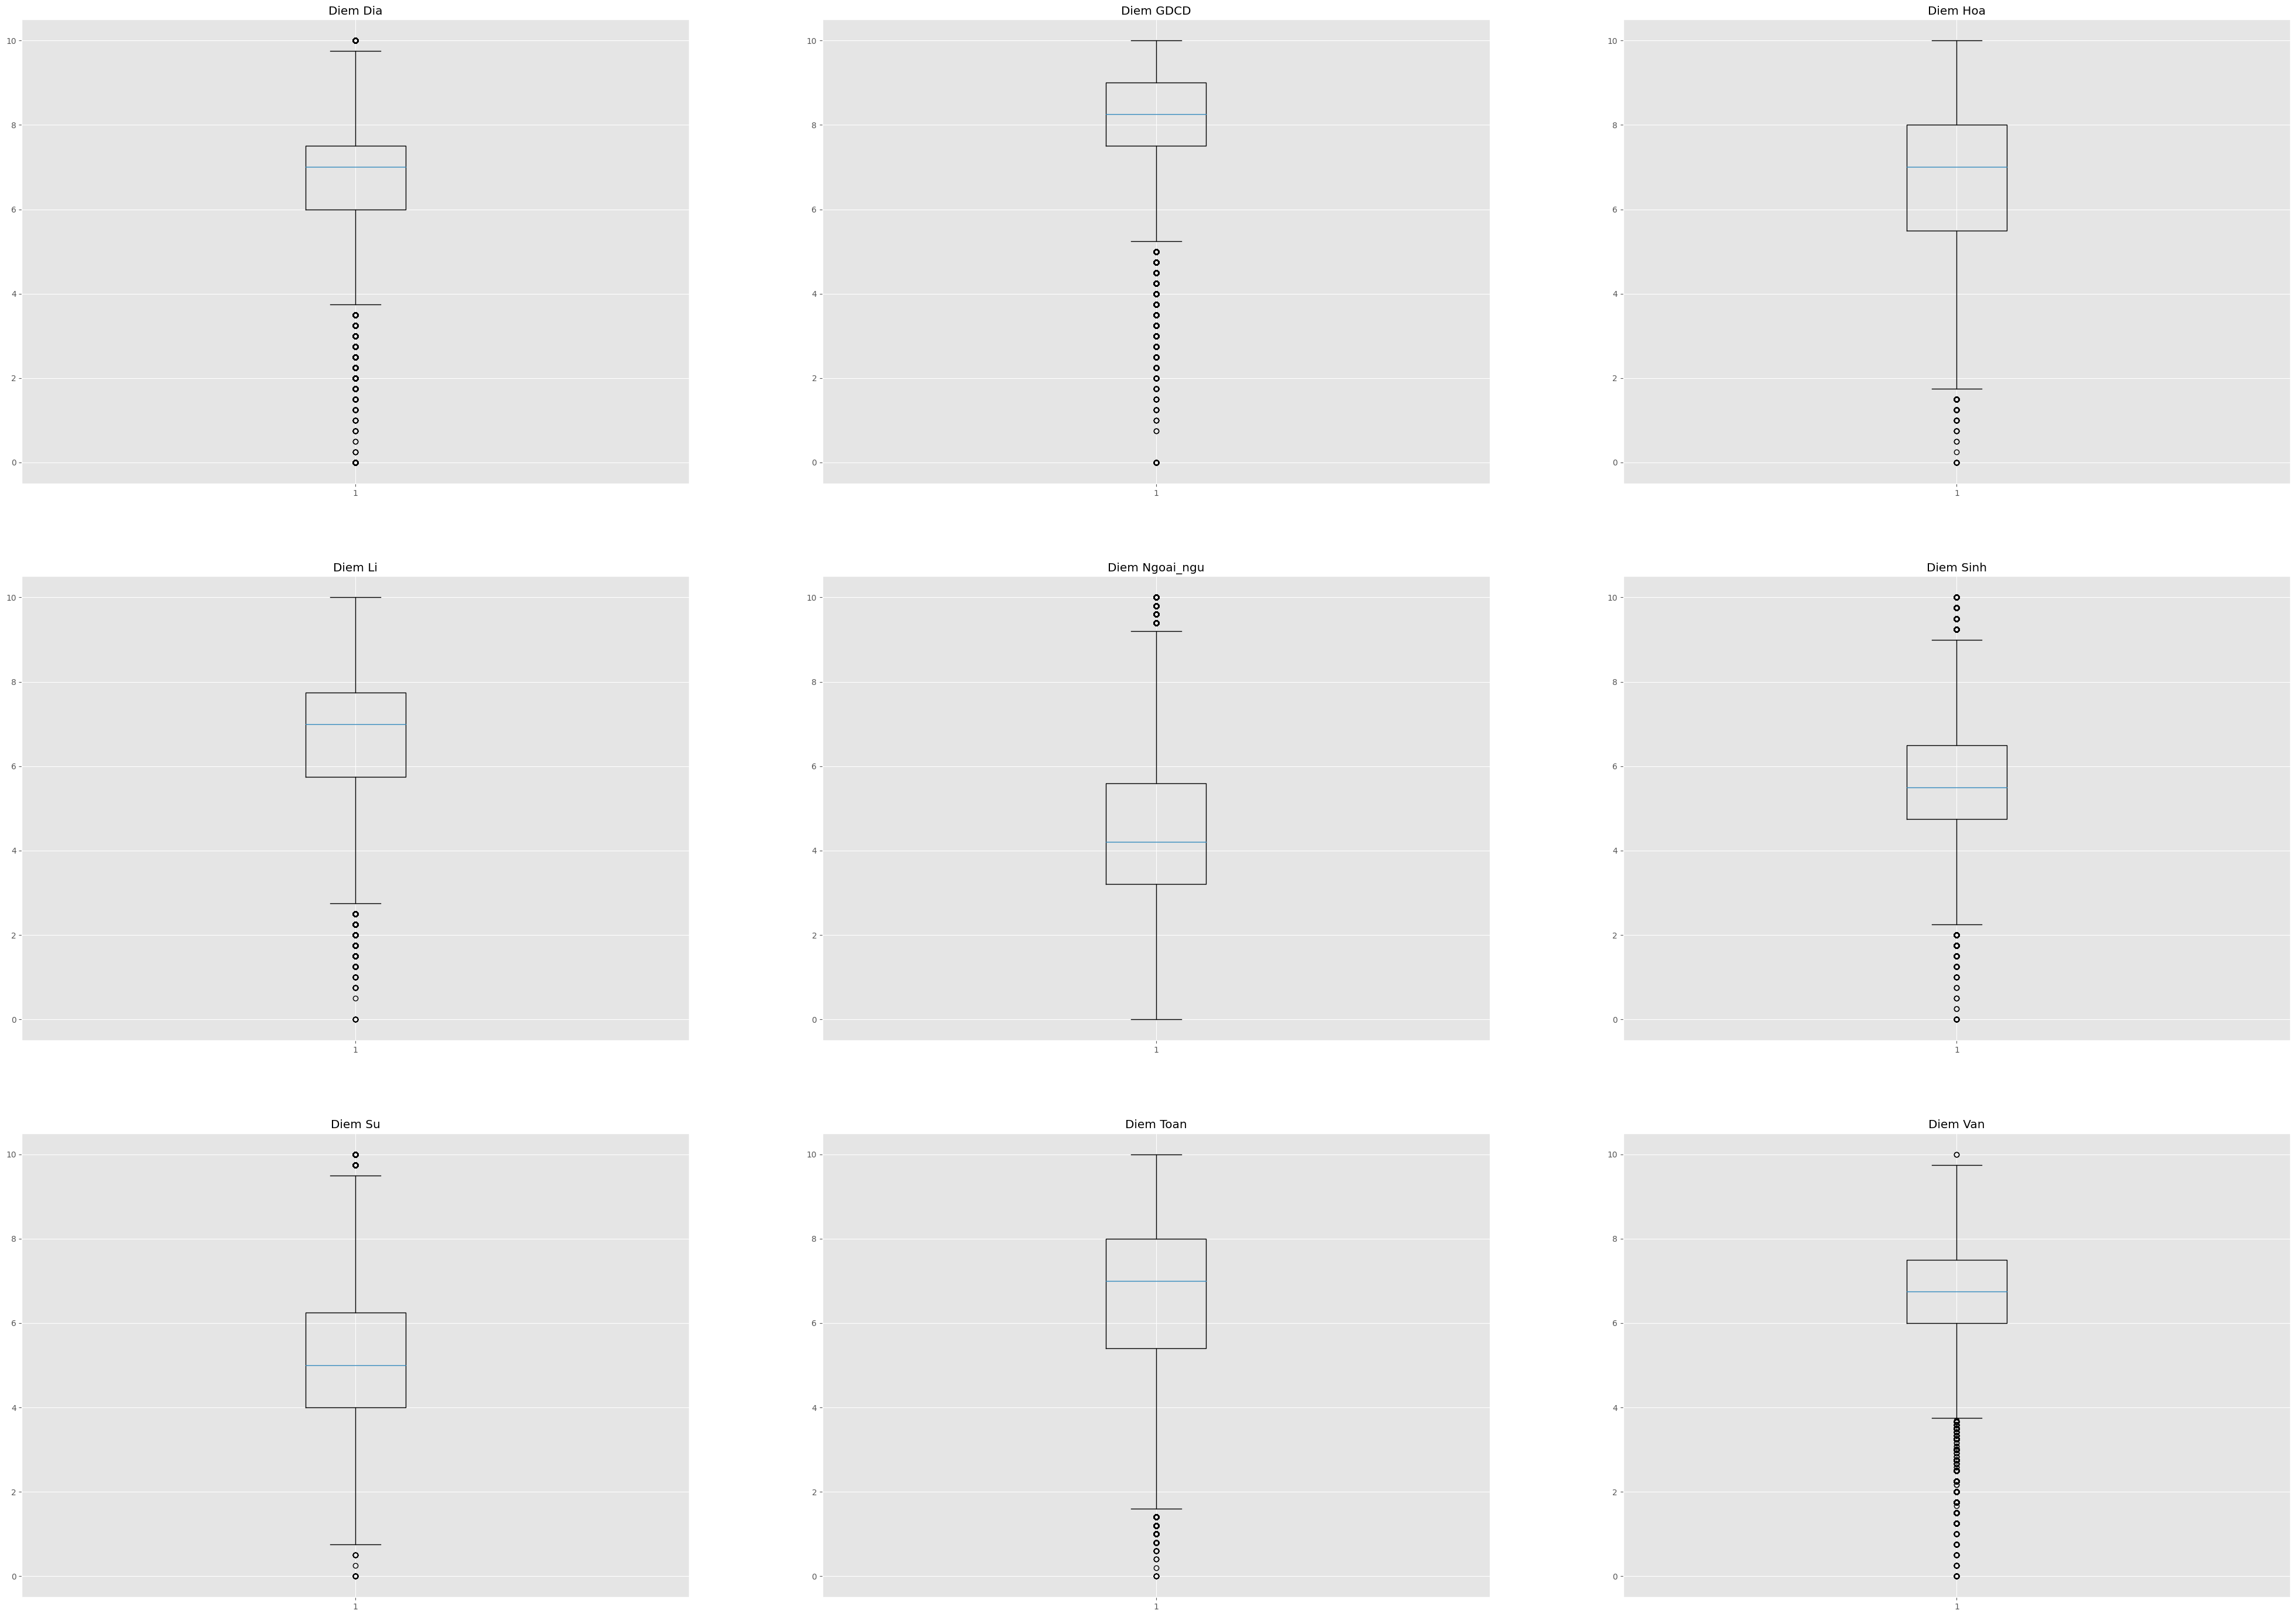

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (50, 35))
for i, col in enumerate(cols):
  r = i//3
  c = i%3
  ax[r][c].boxplot(dicts[col])
  ax[r][c].set(title = 'Diem '+col)
plt.show()

In [ ]:
# cau 1.7 
n_numerical = len(cols)
corr = []
for i in range(0, n_numerical):
  temp = [None] * i
  for j in range(i, n_numerical):
    temp.append(df.corr(cols[i], cols[j]))
  corr.append(temp)

In [ ]:
print(corr)

[[1.0, 0.8493598106676093, -0.8767283064902611, -0.8765699833555979, -0.1806576742651347, -0.8649348654203103, 0.8905746068623526, -0.3804863966996092, 0.10732760655964951], [None, 1.0, -0.7526230226463632, -0.7524871109445261, 0.07502215183831072, -0.7424990022402572, 0.7752336767679374, -0.2053712635534915, 0.19675279732305687], [None, None, 1.0, 0.9379162053710483, 0.3069968288657231, 0.941315583020342, -0.8358587250336, 0.5576400600596022, 0.031064714349531255], [None, None, None, 1.0, 0.36169474232551874, 0.9002902458542786, -0.8357077822928209, 0.5600626949582406, 0.060171135777198605], [None, None, None, None, 1.0, 0.34283407086164086, -0.175210651369453, 0.5956413777491536, 0.46404518358215996], [None, None, None, None, None, 1.0, -0.8246150472105523, 0.5340251242344233, 0.08338317512702349], [None, None, None, None, None, None, 1.0, -0.32984415094686004, 0.14041449513743645], [None, None, None, None, None, None, None, 1.0, 0.367911290187634], [None, None, None, None, None, Non

In [ ]:
# cau 1.7
cols = ['Dia','GDCD','Hoa','Li']#,'Ngoai_ngu','Sinh','Su','Toan','Van']
n = len(cols)
for i in range(0, n-1):
  for j in range(i, n):
    print(cols[i], cols[j])
    print(df.corr(cols[i], cols[j]), '\n')

Dia Dia
1.0 

Dia GDCD
0.8493598106676093 

Dia Hoa
-0.8767283064902611 

Dia Li
-0.8765699833555979 

GDCD GDCD
1.0 

GDCD Hoa
-0.7526230226463632 

GDCD Li
-0.7524871109445261 

Hoa Hoa
1.0 

Hoa Li
0.9379162053710483 



In [ ]:
# cau 1.8
len(dicts['Toan']), len(dicts['Van'])

(866581, 856565)

In [ ]:
import random

sample_size = 100000
toan_sample = random.sample(dicts['Toan'], sample_size)
van_sample = random.sample(dicts['Van'], sample_size)

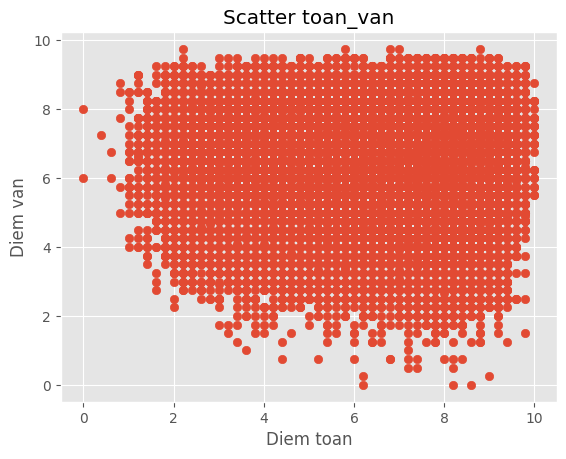

In [ ]:
plt.scatter(toan_sample, van_sample)
plt.xlabel('Diem toan')
plt.ylabel('Diem van')
plt.title('Scatter toan_van')
plt.show()

In [ ]:
# cau 2.1
df.show(5)

In [ ]:
df2 = df.select('Tinh', 'Toan')
gr_df = df2.groupBy('Tinh').agg(collect_list('Toan').alias('Toan'))

In [ ]:
gr_df.show(5)

+----+--------------------+
|Tinh|                Toan|
+----+--------------------+
|  51|[7.8, 9.4, 6.8, 7...|
|  54|[3.2, 5.4, 8.2, 7...|
|  15|[4.4, 7.2, 6.2, 7...|
|  11|[3.8, 7.2, 7.4, 6...|
|  29|[5.4, 9.2, 9.0, 8...|
+----+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import explode
import pyspark.sql.functions as F
from pyspark.sql.window import Window
df5 = gr_df.selectExpr("Tinh", "explode(Toan) as Toan")

df5 = df5.withColumn("stt", (F.row_number().over(Window.partitionBy("Tinh").orderBy("Toan"))))

df5 = df5.groupBy("stt").pivot("Tinh").agg(F.first("Toan"))
df5.select('10', '11', '12', '13', '14', '15').show(10)

+---+---+---+---+---+---+
| 10| 11| 12| 13| 14| 15|
+---+---+---+---+---+---+
|1.6|2.6|1.8|2.2|1.6|2.4|
|1.8|3.6|2.4|2.8|2.0|3.2|
|1.8|3.6|2.4|2.8|2.0|3.2|
|1.8|3.6|2.4|2.8|2.0|3.2|
|2.0|4.4|2.8|3.2|2.4|3.6|
|2.2|4.8|3.0|3.6|2.4|4.0|
|2.2|5.2|3.0|3.8|2.6|4.0|
|2.2|5.4|3.2|3.8|2.6|4.2|
|2.4|5.8|3.2|4.0|2.8|4.4|
|2.4|5.8|3.2|4.0|2.8|4.4|
+---+---+---+---+---+---+
only showing top 10 rows



In [ ]:
cols = df5.columns[7:18]
print(cols)

['16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26']


In [ ]:
bounds = {}
for col in cols:
  quantiles = df5.approxQuantile(col, [0.25, 0.75], 0.05)
  IQR = quantiles[1] - quantiles[0]
  bounds[col] = [quantiles[0]-1.5*IQR , quantiles[1]+1.5*IQR]

In [ ]:
bounds

{'16': [1.200000000000002, 12.399999999999999],
 '17': [-0.6000000000000005, 12.200000000000001],
 '18': [1.5000000000000009, 11.899999999999999],
 '19': [2.3999999999999995, 12.0],
 '20': [4.2, 10.599999999999998],
 '21': [1.7000000000000002, 12.099999999999998],
 '22': [1.200000000000002, 12.399999999999999],
 '23': [-0.9999999999999991, 10.2],
 '24': [2.9, 11.700000000000001],
 '25': [4.1, 11.299999999999999],
 '26': [2.9, 11.700000000000001]}

In [ ]:
outliers = df5.select(*['stt'] + [( (df5[c] < bounds[c][0]) | (df5[c] > bounds[c][1])).alias(c+'_o') for c in cols ])

In [ ]:
outliers.show(10)

+----+-----+-----+-----+-----+----+-----+-----+-----+-----+-----+-----+
| stt| 16_o| 17_o| 18_o| 19_o|20_o| 21_o| 22_o| 23_o| 24_o| 25_o| 26_o|
+----+-----+-----+-----+-----+----+-----+-----+-----+-----+-----+-----+
| 148|false|false|false|false|true|false|false|false| true| true| true|
| 463|false|false|false|false|true|false|false|false|false| true|false|
| 471|false|false|false|false|true|false|false|false|false| true|false|
| 496|false|false|false|false|true|false|false|false|false| true|false|
| 833|false|false|false|false|true|false|false|false|false|false|false|
|1088|false|false|false|false|true|false|false|false|false|false|false|
|1238|false|false|false|false|true|false|false|false|false|false|false|
|1342|false|false|false|false|true|false|false|false|false|false|false|
|1580|false|false|false|false|true|false|false|false|false|false|false|
|1591|false|false|false|false|true|false|false|false|false|false|false|
+----+-----+-----+-----+-----+----+-----+-----+-----+-----+-----

In [ ]:
df_outliers = df5.join(outliers, on='stt')
for x in cols[:5]:
  df_outliers.filter(x+'_o').select('stt', x).show(5)

+---+---+
|stt| 16|
+---+---+
|  1|0.8|
|  6|1.2|
|  3|1.2|
|  5|1.2|
|  4|1.2|
+---+---+
only showing top 5 rows

+---+---+
|stt| 17|
+---+---+
+---+---+

+---+---+
|stt| 18|
+---+---+
| 12|1.4|
|  1|1.2|
| 13|1.4|
|  6|1.4|
| 16|1.4|
+---+---+
only showing top 5 rows

+---+---+
|stt| 19|
+---+---+
| 31|1.6|
| 85|2.0|
| 65|1.8|
| 53|1.8|
|133|2.2|
+---+---+
only showing top 5 rows

+---+---+
|stt| 20|
+---+---+
|148|2.2|
|463|3.0|
|471|3.0|
|496|3.0|
|833|3.4|
+---+---+
only showing top 5 rows



In [ ]:
# cau 2.2
cols_10 = df5.columns[11:21]
cols_10

['20', '21', '22', '23', '24', '25', '26', '27', '28', '29']

In [ ]:
dicts_10 = {}
for col in cols_10:
  dicts_10[col] = df5.select(col).filter(df5[col].isNotNull()).rdd.flatMap(lambda row: row).collect()

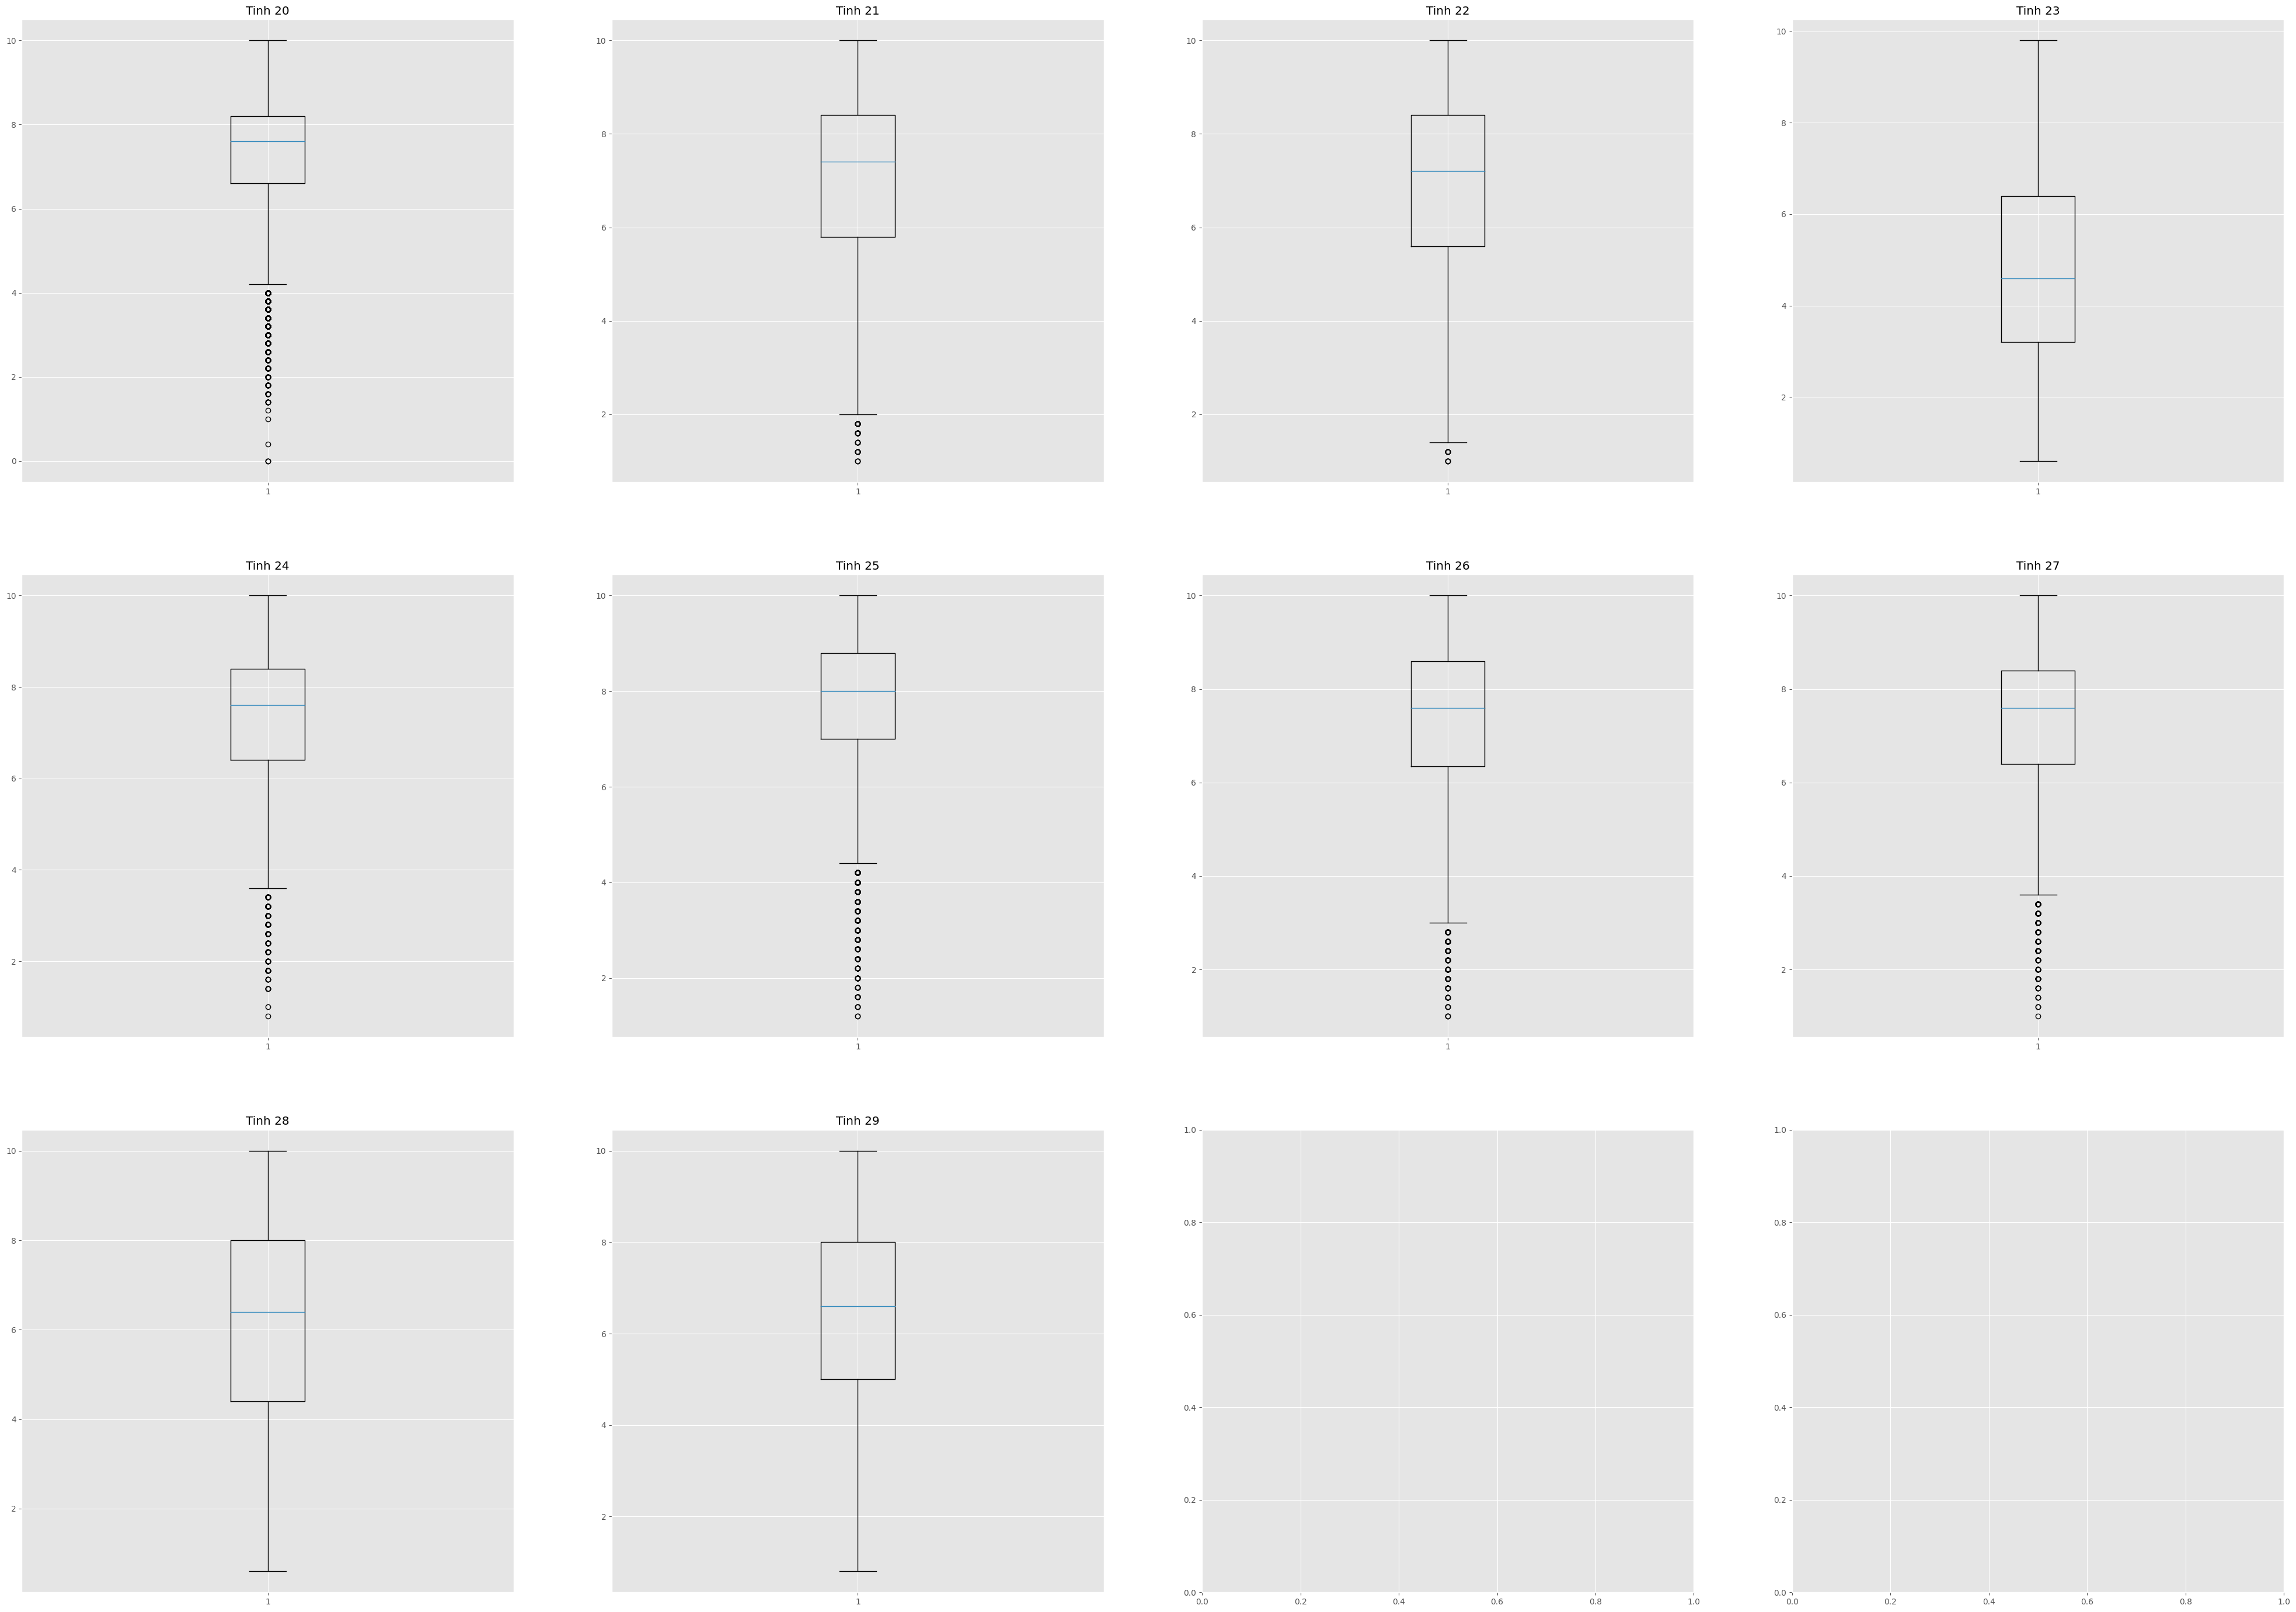

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(50, 35))
for i, col in enumerate(cols_10):
    r = i // 4
    c = i % 4
    ax[r][c].boxplot(dicts_10[col])
    ax[r][c].set(title='Tinh ' + col)
plt.show()

In [ ]:
df_15 = df.filter('Tinh==15')
df_15 = df_15.select([col for col in df_15.columns if (col not in ['TT', 'Ma_mon_ngoai_ngu', 'Tinh'])])

In [ ]:
df_15.show(10)

+----+----+----+----+---------+----+----+----+----+--------+
| Dia|GDCD| Hoa|  Li|Ngoai_ngu|Sinh|  Su|Toan| Van|     sbd|
+----+----+----+----+---------+----+----+----+----+--------+
|8.25| 9.0|null|null|      2.4|null|3.25| 4.4|5.25|15009260|
| 8.5| 9.0|null|null|      5.4|null|6.25| 7.2|6.25|15009242|
| 7.0| 8.5|null|null|      3.0|null| 5.5| 6.2|7.25|15009240|
| 9.0|9.75|null|null|      5.6|null|8.25| 7.6| 8.5|15009237|
|7.75| 8.5|null|null|      3.6|null| 4.5| 6.0|5.75|15009235|
| 7.0|9.25|null|null|      3.6|null|8.25| 6.8|5.25|15009239|
| 7.5|9.25|null|null|      3.8|null|4.25| 6.2| 4.0|15009252|
|null|null| 4.5| 5.5|      7.0|4.25|null| 7.4| 6.5|15009273|
|null|null|7.75|6.25|      4.0| 8.0|null| 9.0| 4.5|15009258|
| 8.5| 9.5|null|null|      6.2|null|8.25| 7.6|6.75|15009250|
+----+----+----+----+---------+----+----+----+----+--------+
only showing top 10 rows



In [ ]:
bounds = {}
for col in df_15.columns[:-1]:
  quantiles = df_15.approxQuantile(col, [0.25, 0.75], 0.05)
  IQR = quantiles[1] - quantiles[0]
  bounds[col] = [quantiles[0]-1.5*IQR , quantiles[1]+1.5*IQR]
outliers = df_15.select(*['sbd'] + [( (df_15[c] < bounds[c][0]) | (df_15[c] > bounds[c][1])).alias(c+'_o') for c in df_15.columns[:-1] ])
outliers.show(5)

+--------+-----+------+-----+----+-----------+------+-----+------+-----+
|     sbd|Dia_o|GDCD_o|Hoa_o|Li_o|Ngoai_ngu_o|Sinh_o| Su_o|Toan_o|Van_o|
+--------+-----+------+-----+----+-----------+------+-----+------+-----+
|15009260|false| false| null|null|      false|  null|false| false|false|
|15009242|false| false| null|null|      false|  null|false| false|false|
|15009240|false| false| null|null|      false|  null|false| false|false|
|15009237|false| false| null|null|      false|  null|false| false|false|
|15009235|false| false| null|null|      false|  null|false| false|false|
+--------+-----+------+-----+----+-----------+------+-----+------+-----+
only showing top 5 rows



In [ ]:
lst1 = ['Dia','GDCD','Hoa','Li','Ngoai_ngu','Sinh','Su','Toan','Van']
df_outliers = df_15.join(outliers, on='sbd')
for x in lst1:
  df_outliers.filter(x+'_o').select('sbd', x).show(5)

+--------+----+
|     sbd| Dia|
+--------+----+
|15000399|9.75|
|15000364|10.0|
|15002459|2.75|
|15011360| 4.5|
|15003445|9.75|
+--------+----+
only showing top 5 rows

+--------+----+
|     sbd|GDCD|
+--------+----+
|15010133| 5.5|
|15013699|6.25|
|15002408|6.25|
|15006405| 6.5|
|15002490|6.25|
+--------+----+
only showing top 5 rows

+--------+----+
|     sbd| Hoa|
+--------+----+
|15000402|1.25|
|15006137|0.75|
|15004132|1.25|
+--------+----+

+--------+---+
|     sbd| Li|
+--------+---+
|15000427|3.5|
|15003518|3.0|
|15004316|3.5|
|15004339|3.5|
|15004691|3.5|
+--------+---+
only showing top 5 rows

+--------+---------+
|     sbd|Ngoai_ngu|
+--------+---------+
|15000262|      8.0|
|15010614|      8.0|
|15012760|      9.4|
|15000527|      8.0|
|15008612|      8.8|
+--------+---------+
only showing top 5 rows

+--------+----+
|     sbd|Sinh|
+--------+----+
|15010565|9.75|
|15011603| 2.0|
|15008795| 9.5|
|15000188|9.25|
|15012468|9.25|
+--------+----+
only showing top 5 rows

+-----

In [ ]:
# cau 3.1
df.show(5)

+---+----+----+----+----+----------------+---------+----+----+----+----+--------+----+
| TT| Dia|GDCD| Hoa|  Li|Ma_mon_ngoai_ngu|Ngoai_ngu|Sinh|  Su|Toan| Van|     sbd|Tinh|
+---+----+----+----+----+----------------+---------+----+----+----+----+--------+----+
|  0| 7.0| 6.5|null|null|              N1|      4.2|null|4.75| 6.4|6.75|18014547|  18|
|  1|7.75|7.75|null|null|              N1|      2.8|null|3.75| 7.6| 6.0|18014530|  18|
|  2| 6.5|null|null|null|            null|     null|null| 4.0| 4.8|4.75|18014521|  18|
|  3| 8.0| 9.5|null|null|              N1|      5.8|null|8.25| 8.0| 7.0|18014517|  18|
|  4|null|null| 8.5| 8.0|              N1|      4.0| 5.0|null| 8.2| 6.5|18014523|  18|
+---+----+----+----+----+----------------+---------+----+----+----+----+--------+----+
only showing top 5 rows



In [ ]:
dft = df.withColumn('A' , (dft['Toan']+ dft['Li']+ dft['Hoa']))\
          .withColumn('B', (dft['Toan']+ dft['Hoa']+ dft['Sinh']))\
          .withColumn('C' ,(dft['Van']+ dft['Su']+ dft['Dia']))\
          .withColumn('D' ,(dft['Toan']+ dft['Van']+ dft['Ngoai_ngu']))

In [ ]:
dft1 = dft.select(['sbd', 'A', 'B', 'C', 'D'])

In [ ]:
dft1.show(5)

+--------+----+----+-----+-----+
|     sbd|   A|   B|    C|    D|
+--------+----+----+-----+-----+
|18014547|null|null| 18.5|17.35|
|18014530|null|null| 17.5| 16.4|
|18014521|null|null|15.25| null|
|18014517|null|null|23.25| 20.8|
|18014523|24.7|21.7| null| 18.7|
+--------+----+----+-----+-----+
only showing top 5 rows



In [ ]:
dft1.count()

870486

In [ ]:
hist_A = dft1.select('A').rdd.flatMap(lambda row: row).histogram(30)
hist_B = dft1.select('B').rdd.flatMap(lambda row: row).histogram(30)
hist_C = dft1.select('C').rdd.flatMap(lambda row: row).histogram(30)
hist_D = dft1.select('D').rdd.flatMap(lambda row: row).histogram(30)

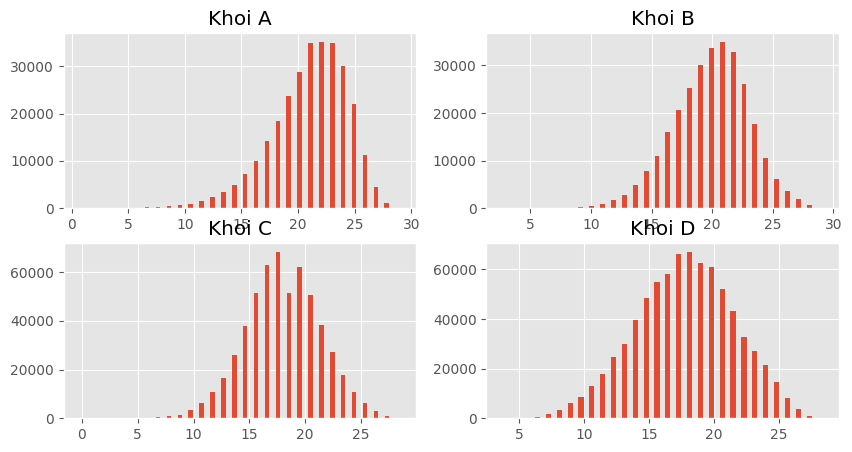

In [ ]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))
ax1.bar(hist_A[0][:-1], hist_A[1], width = 0.4)
ax1.set(title = 'Khoi A')
ax2.bar(hist_B[0][:-1], hist_B[1], width = 0.4)
ax2.set(title = 'Khoi B')
ax3.bar(hist_C[0][:-1], hist_C[1], width = 0.4)
ax3.set(title = 'Khoi C')
ax4.bar(hist_D[0][:-1], hist_D[1], width = 0.4)
ax4.set(title = 'Khoi D')
plt.show()

In [ ]:
# cau 3.2 

# do lech cua 4 khoi thi 
dft1.agg({'A':'skewness'}).show()
dft1.agg({'B':'skewness'}).show()
dft1.agg({'C':'skewness'}).show()
dft1.agg({'D':'skewness'}).show()

+-------------------+
|        skewness(A)|
+-------------------+
|-0.7955909103557588|
+-------------------+

+-------------------+
|        skewness(B)|
+-------------------+
|-0.3023411364020275|
+-------------------+

+--------------------+
|         skewness(C)|
+--------------------+
|-0.09897128979206726|
+--------------------+

+--------------------+
|         skewness(D)|
+--------------------+
|-0.14644530125673985|
+--------------------+



In [ ]:
# do nhon cua 4 khoi thi
dft1.agg({'A':'kurtosis'}).show()
dft1.agg({'B':'kurtosis'}).show()
dft1.agg({'C':'kurtosis'}).show()
dft1.agg({'D':'kurtosis'}).show()

+------------------+
|       kurtosis(A)|
+------------------+
|0.8548062292789016|
+------------------+

+-------------------+
|        kurtosis(B)|
+-------------------+
|0.17561084963943552|
+-------------------+

+-------------------+
|        kurtosis(C)|
+-------------------+
|0.08359657433925838|
+-------------------+

+-------------------+
|        kurtosis(D)|
+-------------------+
|-0.2976920163430483|
+-------------------+



In [ ]:
#cau 3.3
pie_A = dft1.select('A').filter('A>15').rdd.flatMap(lambda row: row).histogram(4)
pie_B = dft1.select('B').filter('B>15').rdd.flatMap(lambda row: row).histogram(4)
pie_C = dft1.select('C').filter('C>15').rdd.flatMap(lambda row: row).histogram(4)
pie_D = dft1.select('D').filter('D>15').rdd.flatMap(lambda row: row).histogram(4)

In [ ]:
labels_A = ['{}-{}'.format(pie_A[0][i], pie_A[0][i+1]) for i in range(len(pie_A[0])-1)]
labels_B = ['{}-{}'.format(pie_B[0][i], pie_B[0][i+1]) for i in range(len(pie_B[0])-1)]
labels_C = ['{}-{}'.format(pie_C[0][i], pie_C[0][i+1]) for i in range(len(pie_C[0])-1)]
labels_D = ['{}-{}'.format(pie_D[0][i], pie_D[0][i+1]) for i in range(len(pie_D[0])-1)]
sizes_A = pie_A[1]
sizes_B = pie_B[1]
sizes_C = pie_C[1]
sizes_D = pie_D[1]

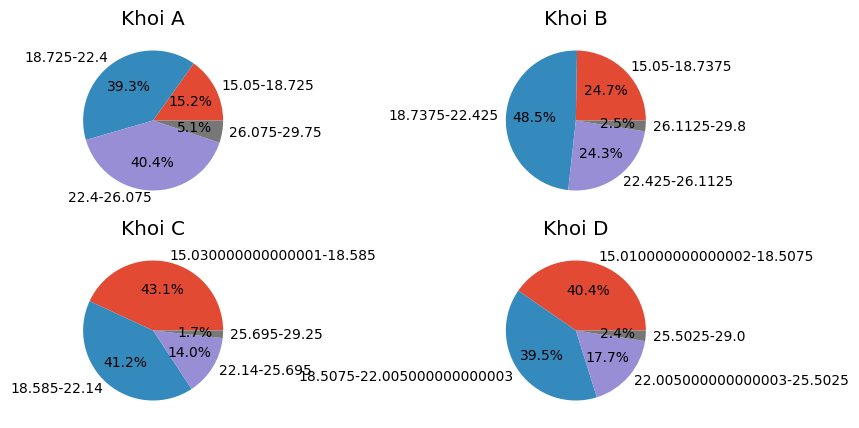

In [ ]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))

ax1.pie(sizes_A, labels=labels_A, autopct='%1.1f%%')
ax1.set(title = 'Khoi A')
ax2.pie(sizes_B, labels=labels_B, autopct='%1.1f%%')
ax2.set(title = 'Khoi B')
ax3.pie(sizes_C, labels=labels_C, autopct='%1.1f%%')
ax3.set(title = 'Khoi C')
ax4.pie(sizes_D, labels=labels_D, autopct='%1.1f%%')
ax4.set(title = 'Khoi D')
plt.show()